In [2]:
#Find the time of the next reaction
#Find which is next reaction
#update t+=tau
#x+=sm

#tau1 ~Exp(W1)
#tau2 ~Exp(W2)
#tau = min(tau1,tau2)

#1) generate tetai for each i
#tau = min{taui}
#mi = argmin{taui}
#2) update


#generating rantom numbers for each reaction

#Alghorithm 2 
#p(tau1<tau) = 1 - e^(-w1*tau)
#p(tau2<tau) = 1 - e^(-w2*tau)
#p(max(tau1,tau2)) < tau --> product of the above probabilities
#(1-e^(-w1*tau))(1-e^(-w2*tau))

#Gillespi direct
#Next reaction method

In [3]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

from skimage import io, measure               # Module from skimage
from skimage.filters import gaussian # Module working with a gaussian filter                           # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as ski_io, color as ski_color, filters as ski_filters
from PIL import Image
import cellpose
import scipy as sp
import cv2
import os
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.filters import difference_of_gaussians
from skimage.measure import label, regionprops, find_contours
from skimage import measure

In [4]:
#model variables

#x1 = gene (DNA)
#x2 = mRNA nuclei
#x3 = mRNA cytoplasm
#x4 = protein

#Reactions
#R1 = Gene Degradation
#R2 = Gene Transcription
#R3 = mRNA Nuclear Export
#R4 = mRNA Nuclear degradation
#R5 = mRNA Cytoplasmic degradation
#R6 = mRNA Cytoplasmic Translation
#R7 = protein Degradation

#initial conditions
x1 = 100
x2 = 0
x3 = 0
x4 = 0

#simulation time
t = 0
T = 100

#stochiometry = [[-1,0,0,0],[0,1,0,0],[0,-1,1,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1],[0,0,0,-1]]

S1 = np.array([-1,0,0,0])
S2 = np.array([0,1,0,0])
S3 = np.array([0,-1,1,0])
S4 = np.array([0,-1,0,0])
S5 = np.array([0,0,-1,0])
S6 = np.array([0,0,0,1])
S7 = np.array([0,0,0,-1])

k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.1
k5 = 0.1
k6 = 0.1
k7 = 0.1

w1 = k1*x1
w2 = k2*x1
w3 = k3*x2
w4 = k4*x2
w5 = k5*x3
w6 = k6*x3
w7 = k7*x4

r1 = -k1*x1
r2 = k2*x2
r3 = -k3*x2 + k3*x3
r4 = -k4*x2
r5 = -k5*x3
r6 = k6*x4
r7 = -k7*x4


#simulation
#while t<T:
    #generate random numbers
   #r = [random.random() for i in range(2)]
    #calculate tau
    #tau = -np.log(r[0])/sum(w)
    #calculate next reaction
    #mu = np.argmax(np.cumsum(w)>r[1]*sum(w))
    #update time
    #t += tau
    #update state
    #x = x + stochiometry[mu]
    #print(t,x)




In [5]:
# Stoichiometry matrix
S = np.array([
    [-1, 0, 0, 0],  # R1: Gene Degradation
    [0, 1, 0, 0],   # R2: Gene Transcription
    [0, -1, 1, 0],  # R3: mRNA Nuclear Export
    [0, -1, 0, 0],  # R4: mRNA Nuclear Degradation
    [0, 0, -1, 0],  # R5: mRNA Cytoplasmic Degradation
    [0, 0, 0, 1],   # R6: mRNA Cytoplasmic Translation
    [0, 0, 0, -1]   # R7: Protein Degradation
])

# Propensity functions
def propensities(x):
    return np.array([
        k1 * x[0],  # R1
        k2 * x[0],  # R2
        k3 * x[1],  # R3
        k4 * x[1],  # R4
        k5 * x[2],  # R5
        k6 * x[2],  # R6
        k7 * x[3]   # R7
    ])

# Initial state
x = np.array([x1, x2, x3, x4])

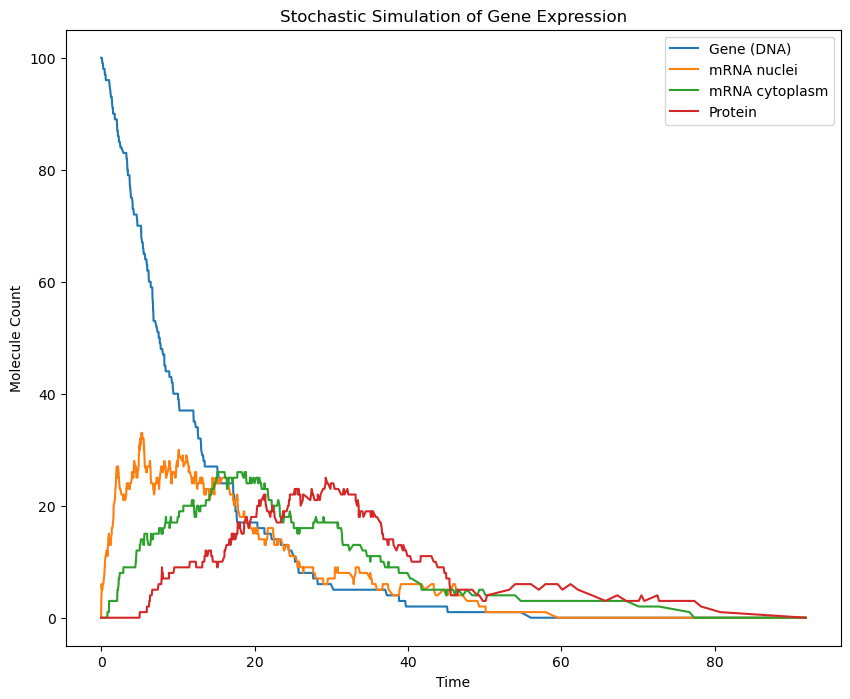

In [7]:
# Lists to store results
time = 0
T = 100
times = [time]
results = [x.copy()]

# Gillespie algorithm
while time < T:
    a = propensities(x)
    a0 = a.sum()
    if a0 == 0:
        break
    r = np.random.random(2)
    tau = (1 / a0) * np.log(1 / r[0])
    mu = np.searchsorted(np.cumsum(a), r[1] * a0)
    
    x += S[mu]
    time += tau
    
    times.append(time)
    results.append(x.copy())

results = np.array(results)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(times, results[:, 0], label='Gene (DNA)')
plt.plot(times, results[:, 1], label='mRNA nuclei')
plt.plot(times, results[:, 2], label='mRNA cytoplasm')
plt.plot(times, results[:, 3], label='Protein')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Simulation of Gene Expression')
plt.show()